<a href="https://colab.research.google.com/github/LinggarM/Movie-Genre-Classification-based-on-synopsis-using-Deep-Neural-Network-and-TF-IDF-Vectorizer/blob/main/Movie_Genre_Classification_based_on_synopsis_using_Deep_Neural_Network_and_TF_IDF_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieve Data

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline 
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

df = pd.read_csv("movie-file.csv")

df_movies = df[['info/plot','info/genres/0']].copy()


In [5]:
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4609 entries, 0 to 4608
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   info/plot      4183 non-null   object
 1   info/genres/0  4606 non-null   object
dtypes: object(2)
memory usage: 72.1+ KB


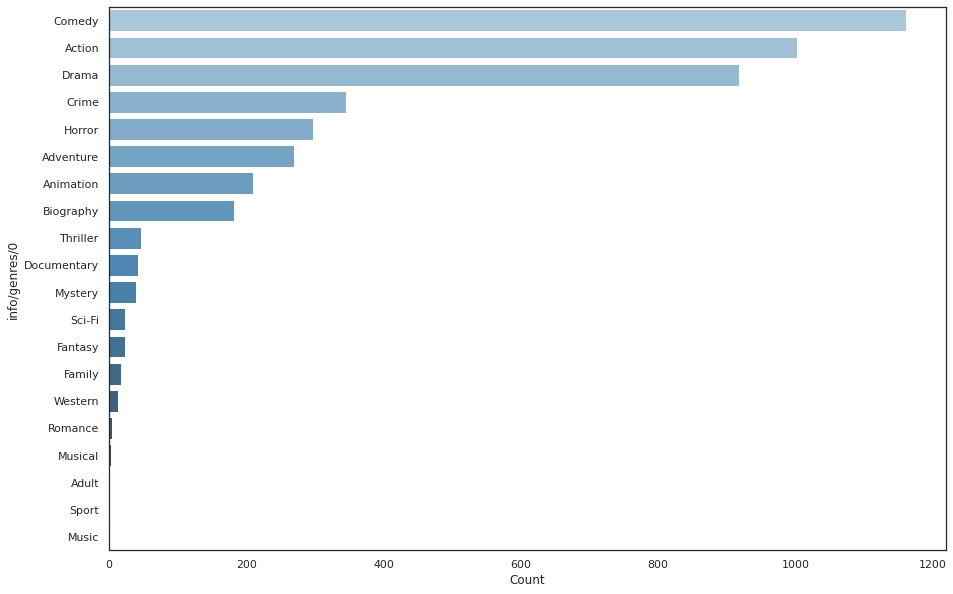

In [6]:
a=df_movies['info/genres/0'].value_counts()[:20]
sns.set(style="white")
genre_to_count=pd.DataFrame({'info/genres/0':a.index, 'Count':a.values})
plt.figure(figsize=(15,10))
sns.barplot(y="info/genres/0", x="Count", data=genre_to_count,palette="Blues_d")

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(df_movies['info/genres/0'].values)
print(max(labels))

22


In [8]:
df_genres = pd.DataFrame(encoder.classes_)
print(len(df_genres))
df_genres = df_genres.dropna()
print(len(df_genres))


23
22


In [9]:
df_movies['label'] = labels
df_movies

,info/plot,info/genres/0,label
0,A re-creation of the merciless 1970s rivalry b...,Action,0
1,When Keller Dover's daughter and her friend go...,Crime,6
2,Katniss Everdeen and Peeta Mellark become targ...,Action,0
3,Faced with an enemy that even Odin and Asgard ...,Action,0
4,While attending a party at James Franco's hous...,Comedy,5
...,...,...,...
4604,NaN,Drama,8
4605,NaN,Drama,8
4606,NaN,Action,0
4607,While traveling across country with her fiance...,Crime,6


# Data Preprocessing

In [10]:
df_movies = df_movies.dropna()

print(len(df_movies['info/plot']))
print(len(df_movies['info/plot']))

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_movies['info/plot'].values, df_movies['label'].values, test_size = 0.2, random_state = 0)

4181
4181


# Feature Engineering

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', lowercase = True)
features = vectorizer.fit_transform(x_train) # training vector TF-IDF pada tiap data
features_test = vectorizer.transform(x_test)

print(features)

  (0, 3780)	0.26884650333487786
  (0, 5456)	0.20108565233349254
  (0, 5537)	0.30917688970535173
  (0, 2130)	0.30917688970535173
  (0, 10496)	0.2582856082370223
  (0, 6802)	0.30917688970535173
  (0, 5442)	0.29429214406904264
  (0, 6819)	0.30917688970535173
  (0, 1589)	0.30917688970535173
  (0, 1201)	0.22851611696440402
  (0, 1313)	0.29429214406904264
  (0, 1726)	0.30917688970535173
  (0, 9019)	0.1469599266691641
  (1, 1608)	0.3150221756407743
  (1, 2112)	0.37006903726612833
  (1, 9359)	0.2048005327520481
  (1, 927)	0.287821367105754
  (1, 8277)	0.17863366285305762
  (1, 4483)	0.1890770418977484
  (1, 9625)	0.1905297482403343
  (1, 8681)	0.21081417514302725
  (1, 9662)	0.2525659705468043
  (1, 3004)	0.35225275257282657
  (1, 5588)	0.23326003931149353
  (1, 6897)	0.22524876362682836
  :	:
  (3342, 6930)	0.28143796830509166
  (3342, 9444)	0.2635044862746874
  (3342, 687)	0.27133835497961195
  (3342, 5673)	0.2635044862746874
  (3342, 9033)	0.19945029552881854
  (3342, 5059)	0.22054157742440

In [12]:
features[0]

<1x10575 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [13]:
print(type(features),features.shape)

<class 'scipy.sparse.csr.csr_matrix'> (3344, 10575)


In [14]:
print(y_train[:10])

[ 4  8  8  0 12  5  6  0  2  0]


# Model Training

## SVM

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()
svm_model.fit(features, y_train)

SVC()

In [16]:
y_pred = svm_model.predict(features_test)
accuracy_score(y_test, y_pred)

0.4169653524492234

## Multinomial Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb_model = MultinomialNB()
mnb_model.fit(features, y_train)

MultinomialNB()

In [18]:
y_pred = mnb_model.predict(features_test)
accuracy_score(y_test, y_pred)

0.4217443249701314

Text(63.980000000000004, 0.5, 'Actual Class')

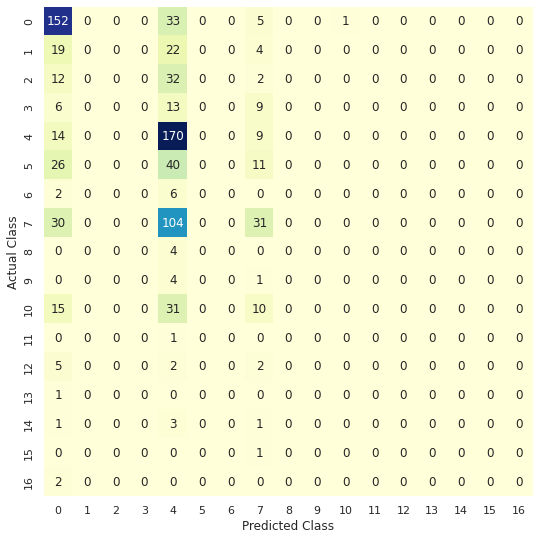

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(conf_mat, square = True, annot=True, fmt = 'd', cmap="YlGnBu", cbar = False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

## Neural Network

In [20]:
import tensorflow.python.keras.backend as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Softmax, Dropout

model = Sequential()
model.add(Dense(256 , activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(22))
model.add(Softmax())

In [21]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
print(features_test.shape)


(837, 10575)


In [25]:
history = model.fit(features, y_train, validation_data = (features_test, y_test), epochs = 20)


Epoch 1/20
105/105 [==============================] - 7s 63ms/step - loss: 1.3908 - accuracy: 0.5472 - val_loss: 2.1385 - val_accuracy: 0.3763
Epoch 2/20
105/105 [==============================] - 4s 38ms/step - loss: 0.9691 - accuracy: 0.6890 - val_loss: 2.4800 - val_accuracy: 0.3286
Epoch 3/20
105/105 [==============================] - 4s 37ms/step - loss: 0.7447 - accuracy: 0.7566 - val_loss: 2.7557 - val_accuracy: 0.3274
Epoch 4/20
105/105 [==============================] - 4s 37ms/step - loss: 0.5667 - accuracy: 0.8173 - val_loss: 3.1230 - val_accuracy: 0.3118
Epoch 5/20
105/105 [==============================] - 4s 39ms/step - loss: 0.4201 - accuracy: 0.8852 - val_loss: 3.3986 - val_accuracy: 0.3047
Epoch 6/20
105/105 [==============================] - 4s 37ms/step - loss: 0.3194 - accuracy: 0.9160 - val_loss: 3.5660 - val_accuracy: 0.2999
Epoch 7/20
105/105 [==============================] - 4s 39ms/step - loss: 0.2331 - accuracy: 0.9438 - val_loss: 3.7612 - val_accuracy: 0.2939

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2707456   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 22)                2

In [27]:
loss, acc = model.evaluate(features, y_train)
print("Train Accuracy: ", acc*100)


loss, acc = model.evaluate(features_test, y_test)
print("Test Accuracy: ", acc*100)

105/105 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9892
Train Accuracy:  98.9234447479248
27/27 [==============================] - 0s 3ms/step - loss: 4.8767 - accuracy: 0.2820
Test Accuracy:  28.19593846797943


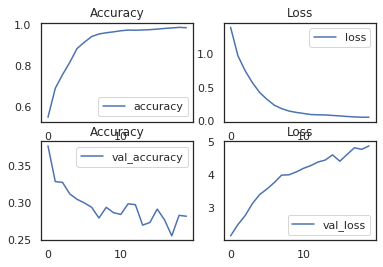

In [28]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.subplot(222)
plt.title("Loss")
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.subplot(223)
plt.title("Accuracy")
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.subplot(224)
plt.title("Loss")
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [29]:
y_pred = model.predict(features)



105/105 [==============================] - 1s 4ms/step


In [30]:
def mean_probability(model, predictor):
    _, test_x = train_test_split(predictor, test_size=0.2, random_state=9001)
    
    return model.predict_proba(test_x).mean()